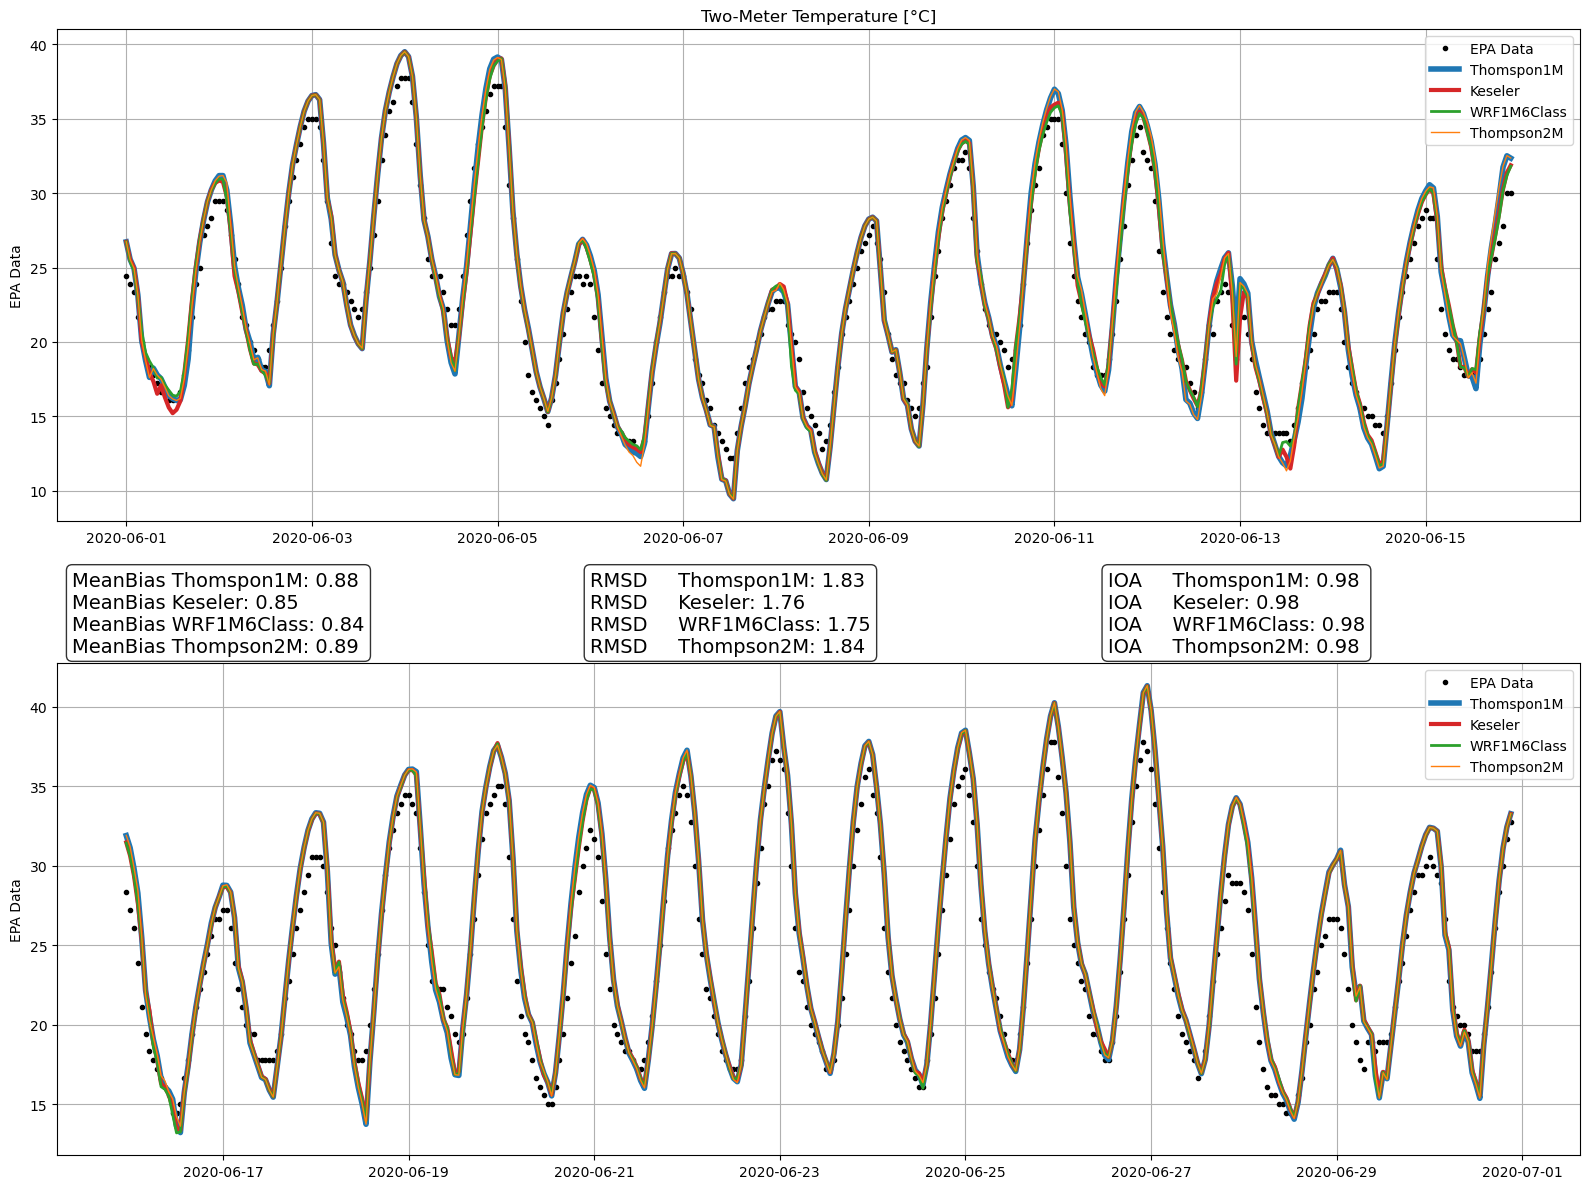

[[0.8802970931095597, 0.8452121641347601, 0.8427765383730957, 0.8933038294186432], [1.830215298414391, 1.7592776970174822, 1.7499344160626111, 1.8446982506948317], [0.981395677205256, 0.9826056925951585, 0.9827283815879782, 0.9811339114436421]]


In [1]:
## Loading the Libaries.
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob
from PyWRFFun import MonthTimeSeries, MonthGlob

# === Inputs ===
Var = "T2"
VarLabel = "Two-Meter Temperature [°C]"
lat_point = 38.593322
lon_point = -121.503795
## Load the EPA Data Input File
DataVal = (np.loadtxt("/data/wto/EPAMetData/hourly_TEMP_2020_06_Sac.csv", delimiter=',',usecols=[13])-32)*5/9

# === Get monthly WRF Values ===
WRFFiles = ["/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_FDDA1_250714/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_MP1_FDDA1_250716/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_MP6_FDDA1_250718/wrfout_d01_2020-06-*",
            "/data/wto/WRFOUT/Sac_NDown_UCM1_PBL1_MP38_FDDA1_250719/wrfout_d01_2020-06-*"]
Time, Vals = MonthGlob(WRFFiles, Var, lat_point, lon_point, offset=-273.15)
# Concatenate the Data and WRF Values The [] around DataVal is needed to make sure it adds the array into the list.
Vals = [DataVal] + Vals
# === Call MonthTimeSeries plot function ===
results = MonthTimeSeries(Time,Vals,VarLabel, ["EPA Data","Thomspon1M","Keseler","WRF1M6Class","Thompson2M"],Show=True)
print(results)